# Polimondu ģeometrijas piemēri

**1. piemērs:** Izvada virsotnes un visus veselos punktus uz polimonda perimetra.

In [1]:
from polyforms.polyiamond import Polyiamond

p1 = Polyiamond([(5, 'A'), (4, 'C'), (3, 'E'), (2, 'D'), (1, 'F')])
print('Virsotnes: {}'.format(p1.get_vertices()))
print('Perimetra punkti: {}'.format(p1.list_perimeter()))

Virsotnes: [(0,0,0), (5,0,-5), (5,-4,-1), (2,-1,-1), (0,-1,1)]
Perimetra punkti: [(1,0,-1), (2,0,-2), (3,0,-3), (4,0,-4), (5,0,-5), (5,-1,-4), (5,-2,-3), (5,-3,-2), (5,-4,-1), (4,-3,-1), (3,-2,-1), (2,-1,-1), (1,-1,0), (0,-1,1), (0,0,0)]


**2. piemērs:** Atrod polimonda laukumu, minimālo iekļaujošo sešstūri (*hexagonal bounding box*), 
leņķu skaitu pa lielumiem: $60^{\circ}$, $120^{\circ}$, $240^{\circ}$, $300^{\circ}$:

In [2]:
print('Laukums: {}'.format(p1.get_signed_area()))
print('Iekļaujošā sešstūra gabarīti: {}'.format(p1.get_bounding_sizes()))
print('Iekšējo leņķu skaits (n60,n120,n240,n300): {}'.format(p1.internal_angles()))

Laukums: 19
Iekļaujošā sešstūra gabarīti: (4, 6, 5)
Iekšējo leņķu skaits (n60,n120,n240,n300): (3, 1, 1, 0)


**3. piemērs:** Uzzīmējam daudzstūri un veselos punktus uz tā perimetra.

<Figure size 432x288 with 0 Axes>

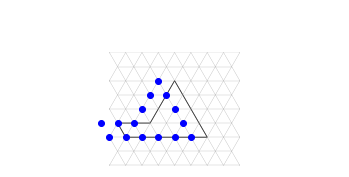

In [3]:
from polyforms.draw_scene import *
from polyforms.perfect_seq import *
from polyforms.polyiamond import Polyiamond
import numpy as np

p1 = Polyiamond('ACEDF')
scene = DrawScene(Align.BASELINE)
scene.add_polyiamond('p1', p1)

scene.pack()
scene.show_grid()
(off_x, off_y) = scene.get_offset('p1')

perimeter = p1.list_perimeter()
perimeter2d = [pp.get_xy() for pp in perimeter]
for (x,y) in perimeter2d:
    scene.ax.plot(x+off_, marker='o', color='blue')
    
scene.set_size_in(6,3)

**4.piemērs:** Uzzīmē 3 polimondus, parāda to izvietojumu horizontālā joslā. Tikai `Align.BASELINE` ir atbalstīts - figūriņas zīmē tā, lai to sākumpunkti, kuros sākas perfektā polimonda garākā mala, sakristu. Citi izlīdzināšanas paņēmieni būtu `Align.TOP`, `Align.BOTTOM`, `Align.CENTER`.

bounding box is (-2.0, 11.0, -1.0, 19.0)


<Figure size 432x288 with 0 Axes>

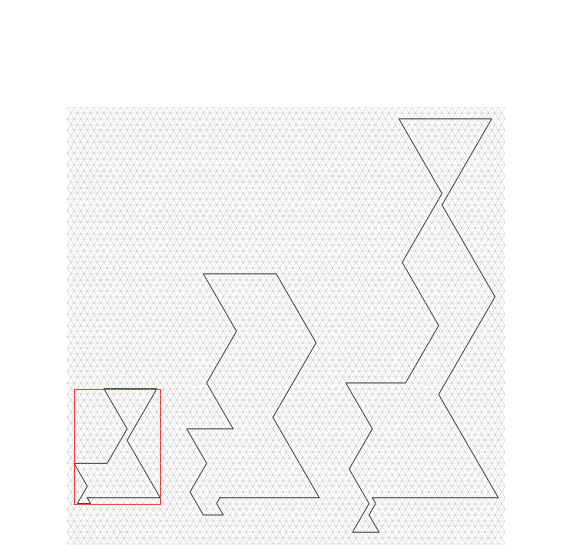

In [4]:
from polyforms.draw_scene import *
from polyforms.perfect_seq import *
from polyforms.polyiamond import Polyiamond
import numpy as np

p_series = PerfectSeq()
seq = p_series.get_series('SEQ_4_3_A')
scene = DrawScene(Align.BASELINE)
monds = [Polyiamond(s) for s in seq]

scene.add_polyiamond('p0', monds[0], box=True)
print('bounding box is {}'.format(monds[0].get_rect_box()))
scene.add_polyiamond('p1', monds[1])
scene.add_polyiamond('p2', monds[2])

scene.pack()
scene.show_grid()
scene.set_size_in(10,10)